In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
df= pd.read_csv("/content/AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data = df[["#Passengers"]].values
data

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [ ]:
data.shape

(144, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ms=MinMaxScaler()
data_norm= ms.fit_transform(data)
data_norm

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [ ]:
print(data_norm[0:1,0] ) #X_data
print(data_norm[1,0])

[0.01544402]
0.02702702702702703


In [ ]:
X_data=[]
y_data=[]
const=1
for i in range(len(data_norm)-1):
  X_data.append(data_norm[i:i+const,0])
  y_data.append(data_norm[i+const,0])




In [ ]:
X_data=np.array(X_data)
y_data=np.array(y_data)

X_data.shape,y_data.shape

((143, 1), (143,))

In [ ]:
X_data=np.reshape(X_data,(X_data.shape[0],X_data.shape[1],1))
X_data.shape

(143, 1, 1)

In [ ]:
train_size=int(len(X_data)*0.70)
X_train=X_data[0:train_size,:]
y_train=y_data[0:train_size]


In [ ]:
X_test=X_data[train_size:len(X_data),:]
y_test=y_data[train_size:len(y_data)]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [ ]:
def model_rnn(inputShape):
  model = Sequential()
  model.add(SimpleRNN(24, activation="relu", input_shape=inputShape, return_sequences=True))
  model.add(SimpleRNN(16, activation="relu", return_sequences=True))
  model.add(SimpleRNN(12, activation="relu", return_sequences=False))
  model.add(Dense(1)) #
  return model

In [ ]:
model= model_rnn((X_train.shape[1],1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 24)             624       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 1, 16)             656       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 12)                348       
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 1,641
Trainable params: 1,641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
model.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
4/4 [==============================] - 4s 9ms/step - loss: 0.0507
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0404
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0309
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0225
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0146
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0093
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0069
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0061
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0054
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0048
Epoch 11/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0042
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0038
Epoch 13/100
4/4 [==============================] - 0s 9ms/s

In [ ]:
y_pred= model.predict(X_test)

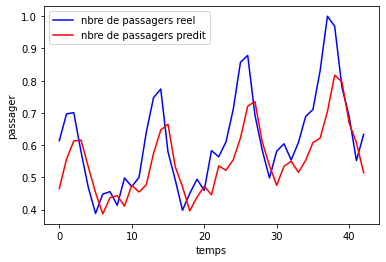

In [ ]:
plt.plot(y_test,color="blue",label="nbre de passagers reel")
plt.plot(y_pred,color="red",label="nbre de passagers predit")
plt.xlabel("temps")
plt.ylabel("passager")
plt.legend()
plt.show()